In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
df = pd.read_pickle('/Users/javieraquezada/Desktop/Retail Analysis/02 Data/cleaned_sample.pkl')

In [4]:
df

Transaction_ID  Customer_ID             Name                 Email  \
77037          8154457        18745      Tara Wright  Jeffrey100@gmail.com   
106765         8896002        82300    Daniel Patton  Cheyenne19@gmail.com   
187652         1820950        49584  Kathleen Watson     Billy97@gmail.com   
184582         9448636        74580  Steven Sullivan   Gabriel71@gmail.com   
290216         8088692        72061       Heather Yu    Daniel32@gmail.com   
...                ...          ...              ...                   ...   
265038         8840651        38662      Kathy Ellis  Michelle59@gmail.com   
78419          7259568        91292    Megan Collins  Michaela13@gmail.com   
210348         9767759        30124     James Warner     Jamie63@gmail.com   
133716         2867588        94521  Gina Villanueva    Daniel17@gmail.com   
136190         2178321        35279    Jordan Reeves   Jonathan1@gmail.com   

               Phone                          Address        City  \
77037   6.443965e+09          474 Kevin Road Apt. 786     Chicago   
106765  1.792779e+09              717 Timothy Prairie    Brisbane   
187652  2.066960e+09  2069 Nicholas Prairie Suite 877  St. John's   
184582  8.490832e+09                912 Randall Manor   Saskatoon   
290216  7.141601e+09                1297 Willis Drive     Halifax   
...              ...                              ...         ...   
265038  8.856982e+09                 690 Kevin Course     Hamburg   
78419   8.443722e+09               346 Velazquez Rest     Chicago   
210348  8.068852e+09                0685 Albert Fords    Hamilton   
133716  7.696473e+09         513 Smith Rest Suite 565      London   
136190  8.187333e+09                3138 Turner Mills      Darwin   

                  State  Zipcode    Country  ...  Total_Amount  \
77037       Connecticut  14063.0        USA  ...   2350.802482   
106765  New South Wales  82508.0  Australia  ...    605.991344   
187652          Ontario  61208.0     Canada  ...    676.659578   
184582          Ontario  53361.0     Canada  ...    272.016496   
290216          Ontario  64745.0     Canada  ...   2394.895305   
...                 ...      ...        ...  ...           ...   
265038           Berlin  58244.0    Germany  ...   1752.600327   
78419       Connecticut  29933.0        USA  ...   1758.932459   
210348          Ontario  36526.0     Canada  ...   3172.002246   
133716          Ontario  97524.0     Canada  ...     78.200892   
136190  New South Wales  32732.0  Australia  ...   1950.065223   

       Product_Category      Product_Brand  \
77037             Books      HarperCollins   
106765         Clothing               Zara   
187652          Grocery              Pepsi   
184582       Home Decor  Bed Bath & Beyond   
290216          Grocery             Nestle   
...                 ...                ...   
265038      Electronics         Mitsubhisi   
78419          Clothing               Nike   
210348       Home Decor         Home Depot   
133716          Grocery             Nestle   
136190      Electronics          Whirepool   

                              Product_Type   Feedback  Shipping_Method  \
77037                              Fiction  Excellent         Standard   
106765                               Jeans  Excellent         Same-Day   
187652                               Water        Bad         Standard   
184582                             Bedding        Bad         Standard   
290216                              Snacks       Good         Standard   
...                                    ...        ...              ...   
265038  Mitsubishi 1.5 Ton 3 Star Split AC  Excellent         Same-Day   
78419                               Shorts        Bad         Standard   
210348                               Tools    Average         Standard   
133716                              Coffee       Good          Express   
136190                              Fridge       Good          Express   

       

In [9]:
import folium
import geopandas as gpd

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9759 entries, 77037 to 136190
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction_ID    9759 non-null   Int64   
 1   Customer_ID       9759 non-null   Int64   
 2   Name              9759 non-null   object  
 3   Email             9759 non-null   object  
 4   Phone             9759 non-null   float64 
 5   Address           9759 non-null   object  
 6   City              9759 non-null   object  
 7   State             9759 non-null   object  
 8   Zipcode           9759 non-null   float64 
 9   Country           9759 non-null   object  
 10  Age               9759 non-null   float64 
 11  Gender            9759 non-null   object  
 12  Income            9759 non-null   object  
 13  Customer_Segment  9759 non-null   object  
 14  Date              9759 non-null   object  
 15  Year              9759 non-null   float64 
 16  Month             9759 

In [8]:
df.head()

Transaction_ID  Customer_ID             Name                 Email  \
77037          8154457        18745      Tara Wright  Jeffrey100@gmail.com   
106765         8896002        82300    Daniel Patton  Cheyenne19@gmail.com   
187652         1820950        49584  Kathleen Watson     Billy97@gmail.com   
184582         9448636        74580  Steven Sullivan   Gabriel71@gmail.com   
290216         8088692        72061       Heather Yu    Daniel32@gmail.com   

               Phone                          Address        City  \
77037   6.443965e+09          474 Kevin Road Apt. 786     Chicago   
106765  1.792779e+09              717 Timothy Prairie    Brisbane   
187652  2.066960e+09  2069 Nicholas Prairie Suite 877  St. John's   
184582  8.490832e+09                912 Randall Manor   Saskatoon   
290216  7.141601e+09                1297 Willis Drive     Halifax   

                  State  Zipcode    Country  ...  Total_Amount  \
77037       Connecticut  14063.0        USA  ...   2350.802482   
106765  New South Wales  82508.0  Australia  ...    605.991344   
187652          Ontario  61208.0     Canada  ...    676.659578   
184582          Ontario  53361.0     Canada  ...    272.016496   
290216          Ontario  64745.0     Canada  ...   2394.895305   

       Product_Category      Product_Brand Product_Type   Feedback  \
77037             Books      HarperCollins      Fiction  Excellent   
106765         Clothing               Zara        Jeans  Excellent   
187652          Grocery              Pepsi        Water        Bad   
184582       Home Decor  Bed Bath & Beyond      Bedding        Bad   
290216          Grocery             Nestle       Snacks       Good   

        Shipping_Method Payment_Method Order_Status  Ratings  \
77037          Standard         PayPal   Processing      5.0   
106765         Same-Day     Debit Card      Shipped      5.0   
187652         Standard    Credit Card      Shipped      1.0   
184582         Standard    Credit Card      Shipped      1.0   
290216         Standard     Debit Card      Shipped      4.0   

                  products  
77037   Historical fiction  
106765      Wide-leg jeans  
187652       Mineral water  
184582     Mattress topper  
290216               Chips  

[5 rows x 30 columns]

In [10]:
# Importing Json file

geojson_path = '/Users/javieraquezada/Desktop/custom.geo.json'

gdf = gpd.read_file(geojson_path)

print(gdf.head())

        featurecla  scalerank  labelrank   sovereignt sov_a3  adm0_dif  level  \
0  Admin-0 country          1          5   Costa Rica    CRI         0      2   
1  Admin-0 country          1          5    Nicaragua    NIC         0      2   
2  Admin-0 country          3          6       France    FR1         1      2   
3  Admin-0 country          3          6  Netherlands    NL1         1      2   
4  Admin-0 country          1          5        Haiti    HTI         0      2   

                type tlc         admin  ... fclass_id  fclass_pl fclass_gr  \
0  Sovereign country   1    Costa Rica  ...      None       None      None   
1  Sovereign country   1     Nicaragua  ...      None       None      None   
2         Dependency   1  Saint Martin  ...      None       None      None   
3            Country   1  Sint Maarten  ...      None       None      None   
4  Sovereign country   1         Haiti  ...      None       None      None   

  fclass_it  fclass_nl fclass_se fclass_bd  

In [11]:
## Cheking Data columns
print(df['Country'].unique())   # your project data
print(gdf['admin'].unique())    # your geojson country names

['USA' 'Australia' 'Canada' 'UK' 'Germany']
['Costa Rica' 'Nicaragua' 'Saint Martin' 'Sint Maarten' 'Haiti'
 'Dominican Republic' 'El Salvador' 'Guatemala' 'Cuba' 'Honduras'
 'United States of America' 'Canada' 'Mexico' 'Belize' 'Panama'
 'Greenland' 'Curaçao' 'Aruba' 'The Bahamas' 'Turks and Caicos Islands'
 'Saint Pierre and Miquelon' 'Trinidad and Tobago' 'Grenada'
 'Saint Vincent and the Grenadines' 'Barbados' 'Saint Lucia' 'Dominica'
 'Montserrat' 'Antigua and Barbuda' 'Saint Kitts and Nevis'
 'United States Virgin Islands' 'Saint Barthelemy' 'Puerto Rico'
 'Anguilla' 'British Virgin Islands' 'Jamaica' 'Cayman Islands' 'Bermuda'
 'Indonesia' 'Malaysia' 'Cyprus' 'India' 'China' 'Israel' 'Palestine'
 'Lebanon' 'Syria' 'South Korea' 'North Korea' 'Bhutan' 'Oman'
 'Uzbekistan' 'Kazakhstan' 'Tajikistan' 'Mongolia' 'Vietnam' 'Cambodia'
 'United Arab Emirates' 'Georgia' 'Azerbaijan' 'Turkey' 'Laos'
 'Kyrgyzstan' 'Armenia' 'Iraq' 'Iran' 'Qatar' 'Saudi Arabia' 'Pakistan'
 'Thailand' 'Kuwai

In [12]:
##Standarizing country names

In [13]:
# Replace mismatched country names
df['Country'] = df['Country'].replace({
    'USA': 'United States of America',
    'UK': 'United Kingdom'
})

In [15]:
## Agregating total amount by country
country_data = df.groupby('Country')['Total_Amount'].sum().reset_index()
country_data.columns = ['admin', 'Total_Amount']  # Rename to match GeoJSON field

In [16]:
merged = gdf.merge(country_data, on='admin', how='left')

In [17]:
import folium
from folium import Choropleth

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add Choropleth layer
Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=['admin', 'Total_Amount'],
    key_on='feature.properties.admin',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='white',
    legend_name='Total Purchase Amount by Country'
).add_to(m)

# Save the map
m.save('/Users/javieraquezada/Desktop/choropleth_map.html')

In [18]:
## Data Wrangling and cleaning (double check just in case)
# Showing columns with missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing values by column:")
print(missing)

Missing values by column:
Series([], dtype: int64)


In [19]:
# Checking descriptive stats for numeric columns
df[['Total_Purchases', 'Amount', 'Total_Amount', 'Age', 'Ratings']].describe()

Total_Purchases       Amount  Total_Amount          Age      Ratings
count      9759.000000  9759.000000   9759.000000  9759.000000  9759.000000
mean          5.394200   254.658565   1374.013745    35.436828     3.156778
std           2.866478   141.661531   1130.855422    15.002073     1.323016
min           1.000000    10.031344     11.000093    18.000000     1.000000
25%           3.000000   131.464685    440.312977    22.000000     2.000000
50%           5.000000   256.664649   1053.939697    32.000000     3.000000
75%           8.000000   376.690561   2043.795167    46.000000     4.000000
max          10.000000   499.996681   4983.048474    70.000000     5.000000

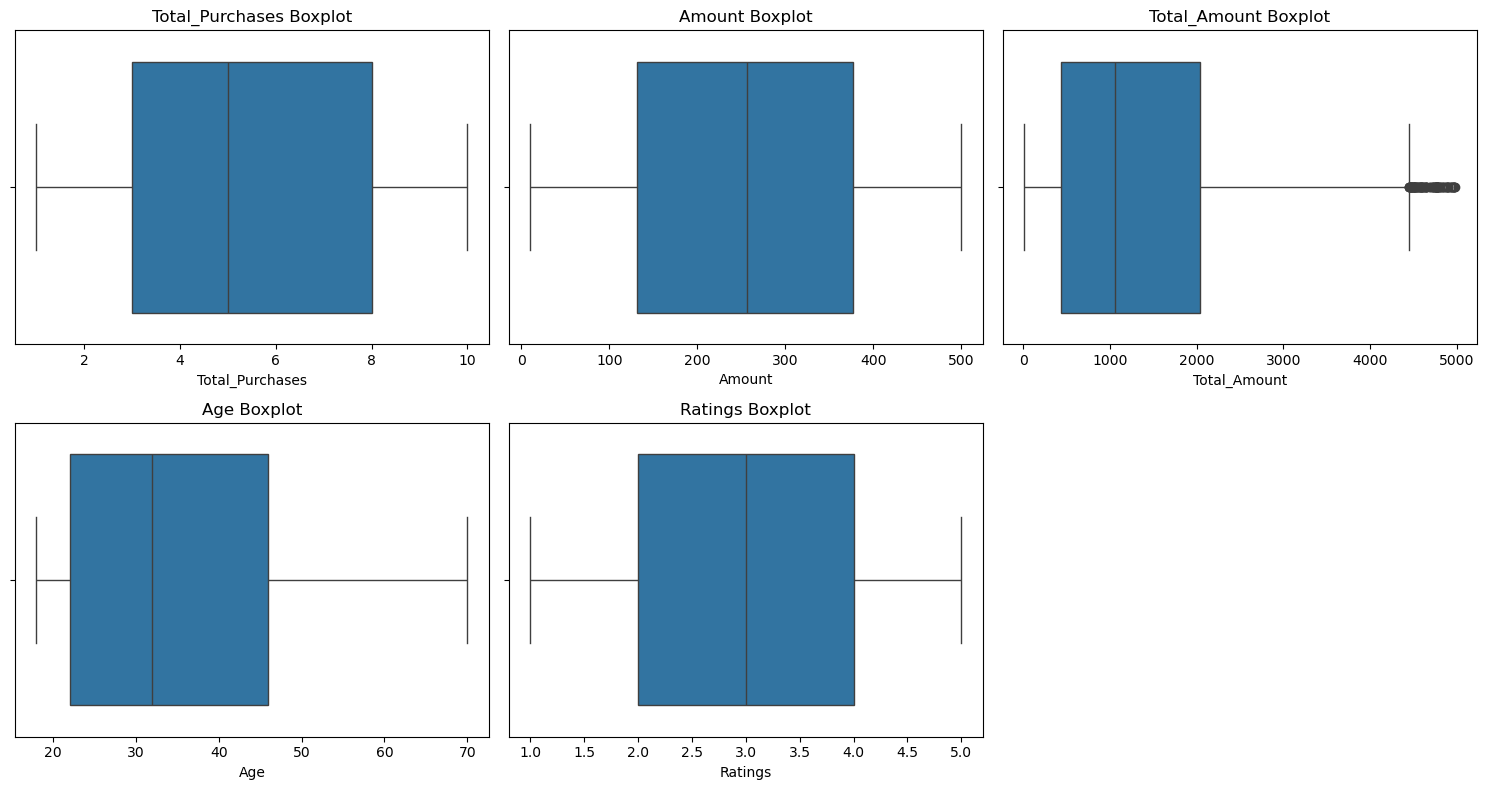

In [21]:
# Creating Visual Confirmation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
columns = ['Total_Purchases', 'Amount', 'Total_Amount', 'Age', 'Ratings']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
##Data Check Notes

#I looked at the main number columns like Total Purchases, Amount, Total Amount, Age, and Ratings. 
#Everything seems fine and doesn’t need fixing right now.
#Total Purchases range from 1 to 10, which makes sense for how many times people buy stuff.
#Amount and Total Amount have some high values, but they seem realistic — some customers just spend more.
#Age is between 18 and 70, which fits a normal adult range.
#Ratings are all between 1 and 5, which is exactly what’s expected.

#So, I’m leaving the data as is for now since there are no weird or impossible numbers. If needed later, I might do some adjustments,
#but for this analysis, it’s good to go.


In [24]:
# Answering point 8
#Geographic Spending Patterns:
#The choropleth map shows spending differences across countries, reflecting economic and cultural influences on customer behavior. 
#This visualization effectively answers the question about how spending varies by country.

#New Questions Raised
#What specific economic or cultural factors drive the spending differences observed across countries?
#How do shipping, payment methods, or product availability affect spending in different regions?
#Can targeted promotions in lower-spending countries help boost customer engagement and revenue?


In [25]:
##Second try of choroplet map
import folium
from folium.features import GeoJsonTooltip

# Initializing map centered roughly on world map
m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodbpositron')

# Choropleth with custom palette and legend
choropleth = folium.Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=['admin', 'Total_Amount'],
    key_on='feature.properties.admin',
    fill_color='YlGnBu',  # a calm blue-green palette
    fill_opacity=0.8,
    line_opacity=0.5,
    nan_fill_color='lightgrey',
    legend_name='Total Purchase Amount by Country',
).add_to(m)

# Adding tooltip with country and amount
tooltip = GeoJsonTooltip(
    fields=['admin', 'Total_Amount'],
    aliases=['Country:', 'Total Spending:'],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 1px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """
)

# Attaching tooltip to geojson layer
choropleth.geojson.add_child(tooltip)

# Adding layer control
folium.LayerControl().add_to(m)

# Showing map
m

In [26]:
#Saving map
m.save('/Users/javieraquezada/Desktop/choropleth_spending_map.html')